In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import collections
from collections import Counter

# Lab 1: Text Corpora and Language Modelling

Welcome to the first lab assignment of INFOMNLP 2020. 

This lab is meant to help you get familiar with some language data, and use this data to estimate simple models called N-gram language models.

First you will use the **Penn Treebank**, which is a collection of newspaper articles from the newspaper 
The Wall Street Journal. The idea is to examine the data and notice interesting properties. This will not take more than a few lines of code. The Penn Treebank may be the most widely used corpus in NLP.

Then you will use a corpus consisting of **TedX** talks. This you will use to estimate an **N-gram language model** for different orders of N, and use this this for some tasks.

The datasets are on Blackboard. Download the zip and make sure to put the files in the same directory as the notebook.

### Rules
* The lab exercises should be made in **groups of two people**.

* The assignment should submitted to **Blackboard** as `.ipynb`. Only **one submission per group**.

* The **filename** should be `lab1_id1_id2.ipynb`.
 
* The questions marked **Extra** or **Optional** are an additional challenge for those interested in going the extra mile. 

* We may not grade all sub-questions (instead, we may choose a sub-set and scale the points). However, solve them as if they were.

Notes on implementation:

* You should **write your code and answers in this iPython Notebook**. (See http://ipython.org/notebook.html for reference material.) If you have problems, please contact your teaching assistant.

* Use only **one cell for code** and **one cell for markdown** answers!    

    * Put all code in the cell with the `# YOUR CODE HERE` comment.
    
    * For theoretical questions, put your solution in the YOUR ANSWER HERE cell.
    
* Test your code and **make sure we can run your notebook**

# 1. Penn treebank

## Exercise 1.1 
(40 points, 5 points per subquestion )

You are provided with a corpus containing words with their Part-of-Speech tags (POS-tags for short). The format is
**word|POS** (one sentence per line) and the file name is **sec02-22.gold.tagged**. This data is extracted from Sections 02-22 from the Penn Treebank: these sections are most commonly used for training statistical models like POS-taggers and parsers.

**[Hint]** **Figure 8.1** in chapter 8 of Jurafsky and Martin (see (https://web.stanford.edu/~jurafsky/slp3/8.pdf)) holds a summary of the 45 POS-tags used in the Penn Treebank tagset together with their meaning and some examples. (If you are keen on learning more about the word-classes represented POS-tags and their definitions you can do a litle reading ahead for next week and already have a look at section 8.1 of the same chapter).

**[Hint]** the Python library [collections](https://docs.python.org/2/library/collections.html) has an object called `Counter` which will come in handy for this exercise.

**(a)** How large is the corpus? (i.e. how **many tokens**). And what is the size of the **vocabulary** used in this corpus? 

Estimate the vocabulary size both by **lowercasing** all the words as well as by leaving the words in their **original orthography**. What is an advantage of lowercasing all the words in your corpus? What is a notable downside? **Give examples.**

In [2]:
## YOUR CODE HERE ##

# Open and read the file
df = open("sec02-21.gold.tagged")
df_contents = df.read()
df.close()
df_contents = df_contents.replace("\n","")
df_contents_l = df_contents.lower()
# Get the separate tokens
df_tokens = df_contents.split(" ")
df_tokens_l = df_contents_l.split(" ")
# This adjustment is needed to remove the last carriage return
df_tokens.pop()
df_tokens_l.pop()
# How many tokens are there?
print("How large is the corpus?")
print(len(df_tokens))
# Now find how big the vocabulary is
df_words = list()
df_words_l = list()
# Extract words from tokens
for token in df_tokens:
    df_words.append(token.split("|")[0])
for token in df_tokens_l:
    df_words_l.append(token.split("|")[0])
cnt = Counter(df_words)
voc = list(cnt)
# count different words and number of occurences
cnt_l = Counter(df_words_l)
print("What is the size of the vocabulary used in this corpus?")
print(len(voc))
print("And after lowercasing it?")
print(len(list(cnt_l)))

How large is the corpus?
929552
What is the size of the vocabulary used in this corpus?
44210
And after lowercasing it?
39384


**What is an advantage of lowercasing all the words in your corpus? What is a notable downside?**

YOUR ANSWERS HERE

An immediate advantage of lowercasing all the words in the corpus is that we can compare words regardless of their position in a sentence (the first word in a sentence is always capitalized and this would wrongly increase the size of our vocabulary).

A notable downside, on the other hand, is not being able to distinguish between unknown or unfrequent words with a real meaning and proper names of buildings, places, people... which only serve to represent a reality and have no other meaning from a language perspective.

------
For the rest of this exercise you should use the **original orthography** of the data when answering the questions.

------


**(b)** Plot a graph of word frequency versus rank of a word, in this corpus. Does this corpus obey **Zipf’s law**?

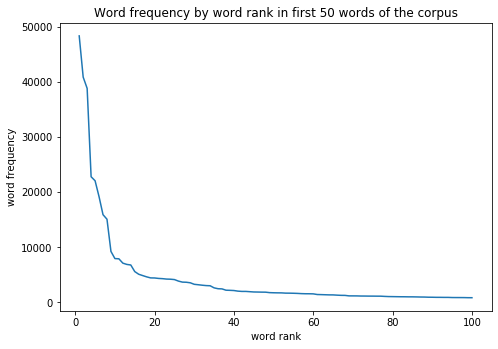

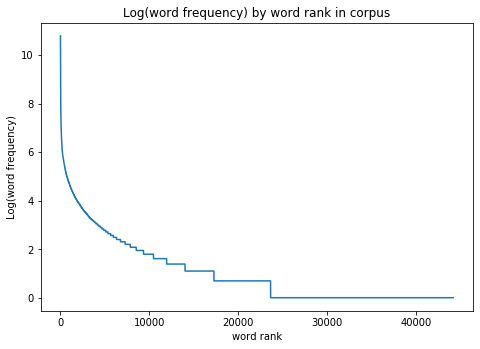

In [3]:
## YOUR CODE HERE ##

ranks = list()
words_by_rank = list()
wordfreq_by_rank = list()
cnt_by_freq = cnt.most_common(100)
# populate the data structure appropriately
for i in range(0,len(cnt_by_freq)):
    words_by_rank.append(cnt_by_freq[i][0])
    ranks.append(i+1)
    wordfreq_by_rank.append(cnt_by_freq[i][1])
# plt.plot(words_by_rank, wordfreq_by_rank)
fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1])
ax1.plot(ranks, (wordfreq_by_rank))
ax1.set_title("Word frequency by word rank in first 50 words of the corpus")
x_lab = ax1.set_xlabel("word rank")
y_lab = ax1.set_ylabel("word frequency")
# plt.plot(np.log(words_by_rank), np.log(wordfreq_by_rank))


ranks = list()
words_by_rank = list()
wordfreq_by_rank = list()
# order words by number of times they appear
cnt_by_freq = cnt.most_common()
# populate the data structure appropriately
for i in range(0,len(cnt_by_freq)):
    words_by_rank.append(cnt_by_freq[i][0])
    ranks.append(i+1)
    wordfreq_by_rank.append(cnt_by_freq[i][1])
# plt.plot(words_by_rank, wordfreq_by_rank)
fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1])
ax1.plot(ranks, np.log(wordfreq_by_rank))
ax1.set_title("Log(word frequency) by word rank in corpus")
x_lab = ax1.set_xlabel("word rank")
y_lab = ax1.set_ylabel("Log(word frequency)")
# plt.plot(np.log(words_by_rank), np.log(wordfreq_by_rank))



**Does this corpus obey Zipf’s law?**

The corpus appears to follow **Zipf's law**. The most frequent words are used a lot more than less frequent ones.

**(c)** What are the **20 most common words** in the corpus and how often do they occur? What is the 50th most common word, the 100th and the 1000th and how often do they occur?

In [4]:
## YOUR CODE HERE ##

# create the list of elements we're interested in
ranks_of_interest = list(range(0,20))
ranks_of_interest.append(49)
ranks_of_interest.append(99)
ranks_of_interest.append(999)
words_of_interest = list()
frequencies_of_interest = list()
# explore the elements in our list
for i in ranks_of_interest:
    words_of_interest.append(words_by_rank[i])
    frequencies_of_interest.append(wordfreq_by_rank[i])
    to_print ="The " + '{:>4}'.format(str(i+1)) + " most common word is " + '{:>5}\''.format("\'" + str(words_by_rank[i])) + " and it occurs " + '{:>5}'.format(str(wordfreq_by_rank[i])) + " times."
    print(to_print)

The    1 most common word is    ',' and it occurs 48310 times.
The    2 most common word is  'the' and it occurs 40839 times.
The    3 most common word is    '.' and it occurs 38798 times.
The    4 most common word is   'of' and it occurs 22782 times.
The    5 most common word is   'to' and it occurs 22056 times.
The    6 most common word is    'a' and it occurs 19171 times.
The    7 most common word is  'and' and it occurs 15906 times.
The    8 most common word is   'in' and it occurs 15085 times.
The    9 most common word is   ''s' and it occurs  9249 times.
The   10 most common word is 'that' and it occurs  7951 times.
The   11 most common word is  'for' and it occurs  7912 times.
The   12 most common word is    '$' and it occurs  7125 times.
The   13 most common word is   'is' and it occurs  6893 times.
The   14 most common word is  'The' and it occurs  6791 times.
The   15 most common word is 'said' and it occurs  5597 times.
The   16 most common word is   'on' and it occurs  5112

**(d)** How many different Part-of-speech tags are present in the corpus?

In [5]:
## YOUR CODE HERE ##

df_pos = list()
for token in df_tokens:
    df_pos.append(token.split("|")[1])
# order pos tags by rank/number of occurences
cnt_pos = Counter(df_pos)
print("There are " + str(len(list(cnt_pos))) + " different POS tags in the corpus")

There are 48 different POS tags in the corpus


**(e)** Print a list of the **10 most commonly occurring POS tags** in the data. For each of these POS tags, what are the **3 most common words** that belong to that class?

In [6]:
## YOUR CODE HERE ##

# pos tags ordered by rank
pos_by_rank = cnt_pos.most_common()

# Function that takes as input a pos tag and an optional integer and returns that many words most commonly associated with the postag
def words_for_pos(pos, n = 3):
    pos_cnt = collections.Counter()
    for token in df_tokens:
        if token.split("|")[1] == pos:
            pos_cnt[token] += 1
    pos_cnt_rank = pos_cnt.most_common()
    out = list()
    for i in range(0,n):
        out.append(pos_cnt_rank[i][0].split("|")[0])
    return out


for i in range(0,10):
    words_to_pos = words_for_pos(pos_by_rank[i][0])
    to_print = "The " + '{:>2}'.format(str(i+1)) + " most common POS tag is " + '{:>4}\''.format("\'" + str(pos_by_rank[i][0])) + " and its 3 most common words are [" + words_to_pos[0] +" - " + words_to_pos[1] + " - " + words_to_pos[2] + "]"
    print(to_print)

The  1 most common POS tag is  'NN' and its 3 most common words are [% - company - year]
The  2 most common POS tag is  'IN' and its 3 most common words are [of - in - for]
The  3 most common POS tag is 'NNP' and its 3 most common words are [Mr. - U.S. - Corp.]
The  4 most common POS tag is  'DT' and its 3 most common words are [the - a - The]
The  5 most common POS tag is  'JJ' and its 3 most common words are [new - other - last]
The  6 most common POS tag is 'NNS' and its 3 most common words are [years - shares - sales]
The  7 most common POS tag is   ',' and its 3 most common words are [, - an - 2]
The  8 most common POS tag is   '.' and its 3 most common words are [. - ? - !]
The  9 most common POS tag is  'CD' and its 3 most common words are [million - billion - one]
The 10 most common POS tag is  'RB' and its 3 most common words are [n't - also - not]


**(f)** A single word may have several POS-tags. For example, *record* can be a both a **noun** *(buy a record)* or a **verb** *(record a lecture)*. This make POS-tags extremely useful for **disambiguation**.

What percentage of the words in the vocabulary is **ambiguous**? (i.e. have more than one POS tag?) What are the 10 most frequent combinations of POS tags in the case of ambitguity? Which words are **most ambiguous**? Give some of them.

In [32]:
## YOUR CODE HERE ##

# This is a dictionary of <key, [postag]> pairs
dict_poss = {}
# This is an ambiguity counter. The number of different postags of a word is its value in this counter + 1
ambiguous_cnt = collections.Counter()
for token in df_tokens:
    decoupled_token = token.split("|")
    # If this word is not new
    if decoupled_token[0] in dict_poss:
        # And its tag is not in our known lists of pos tags for the word
        if not decoupled_token[1] in dict_poss[decoupled_token[0]]:
            # Update the list of pos tags
            dict_poss[decoupled_token[0]].append(decoupled_token[1])
            # And increase its ambiguity counter
            ambiguous_cnt[decoupled_token[0]] += 1
    # If the word is new
    else:
        # Create a new entry in our dictionary of <word:[postag]>
        dict_poss[decoupled_token[0]] = [decoupled_token[1]]
        
# To make printing prettier
common_ambiguous_words = []
for word in ambiguous_cnt.most_common():
    common_ambiguous_words.append(word[0])
    
# In the simple case we only look at complete combinations of tags
full_tag_combination_cnt = collections.Counter()
for word in ambiguous_cnt:
    s = ""
    for tag in sorted(dict_poss[word]):
        s += tag + "+"
    s = s[:-1] # Remove trailing '+'
    full_tag_combination_cnt[s] += 1

# This is tricky. Create a counter for all possible combinations of tags
tag_combination_cnt = collections.Counter()
# Recursive function to perform deep searching on a postag list
def tag_deep_search(pos_list, last_pos, tag_combination):
    # for each other tag in the list
    for i in range(last_pos,len(pos_list)):
        # concatenate to create a new combination
        new_tag_combination = tag_combination + "+" + pos_list[i]
        # increase this counter
        tag_combination_cnt[new_tag_combination] += 1
        # and use recursivity
        tag_deep_search(pos_list, i+1, new_tag_combination)
    return
# Now, loop over postag-ambiguous words
for word in ambiguous_cnt:
    # Loop over postags used in these words
    for i in range(0,len(dict_poss[word])):
        # sort alphabetically the tag list, this solves unordered combination problems
        pos_list = sorted(dict_poss[word])
        # Initialise a tag
        tag = pos_list[i]
        # And start searching from the next tag to avoid creating sets like tag1+tag1
        tag_deep_search(pos_list, i+1, tag)
# To make the printing prettier:
common_combination_tags = []
for combination in tag_combination_cnt.most_common():
    common_combination_tags.append(combination[0])

print("What percentage of the words in the vocabulary is ambiguous?")
# Percentage of ambiguous words in vocabulary
perc_ambiguous = str(round(len(ambiguous_cnt)/len(cnt) * 100,2)) + "%"
print(perc_ambiguous)
print("\nWhat are the 10 most frequent combinations of POS tags in the case of ambitguity?")
print("Here we consider two possible interpretations of the question. If an ambiguous word can take tags 'A', 'B' and 'C', we refer to 'complete list' as the tag combination 'A+B+C' and we refer to 'subsets of possible combinations' as the list of combinations 'A+B','A+C','B+C' and 'A+B+C'")
print("\nIf we consider complete lists of tags for ambiguous words then: ")
l = full_tag_combination_cnt.most_common()
for i in range(10):
    print('{:<10}  {:>4} times'.format(str(l[i][0]) + ":", str(l[i][1])))
print("\nIf we consider all possible subsets of combinations of tags for ambiguous words then: ")
l = tag_combination_cnt.most_common()
for i in range(10):
    print('{:<10}  {:>4} times'.format(str(l[i][0]) + ":", str(l[i][1])))
print("\nWhich words are most ambiguous? Give some of them")
print(common_ambiguous_words[0:10])

What percentage of the words in the vocabulary is ambiguous?
13.47%

What are the 10 most frequent combinations of POS tags in the case of ambitguity?
Here we consider two possible interpretations of the question. If an ambiguous word can take tags 'A', 'B' and 'C', we refer to 'complete list' as the tag combination 'A+B+C' and we refer to 'subsets of possible combinations' as the list of combinations 'A+B','A+C','B+C' and 'A+B+C'

If we consider complete lists of tags for ambiguous words then: 
VBD+VBN:     772 times
JJ+NN:       662 times
NN+NNP:      549 times
VB+VBP:      375 times
NNS+VBZ:     355 times
NN+VB:       351 times
NN+VBG:      315 times
JJ+VBD+VBN:   237 times
NN+VB+VBP:   233 times
JJ+NNP:      218 times

If we consider all possible subsets of combinations of tags for ambiguous words then: 
VBD+VBN:    1060 times
JJ+NN:       962 times
NN+VB:       775 times
VB+VBP:      752 times
NN+NNP:      627 times
JJ+VBN:      456 times
NN+VBP:      403 times
NN+VBG:      378 ti

**(g)**  Print some of these words with their multiple POS-tags. Do you **understand the ambiguity**? Use figure 10.1 mentioned above to interpret the POS-tags.

In [8]:
## YOUR CODE HERE ##

for word in common_ambiguous_words[0:10]:
    print("word " + '{:>5}'.format("\'" + word) + "' is found with this list of POS tags: " + str(dict_poss[word]))

word  'set' is found with this list of POS tags: ['VBN', 'NN', 'VBD', 'VB', 'VBP', 'JJ', 'VBZ']
word 'down' is found with this list of POS tags: ['RB', 'RP', 'IN', 'JJ', 'RBR', 'VBP', 'NN']
word 'many' is found with this list of POS tags: ['JJ', 'NN', 'RB', 'DT', 'PDT', 'VB', 'NP']
word 'open' is found with this list of POS tags: ['VB', 'JJ', 'RP', 'RB', 'VBP', 'NN', 'VBZ']
word 'that' is found with this list of POS tags: ['IN', 'WDT', 'DT', 'RB', 'VBP', 'NN']
word   'in' is found with this list of POS tags: ['IN', 'RP', 'RB', 'CC', 'FW', 'RBR']
word  'cut' is found with this list of POS tags: ['VB', 'VBD', 'NN', 'VBN', 'VBP', 'JJ']
word 'free' is found with this list of POS tags: ['JJ', 'RB', 'NN', 'VB', 'VBP', 'VBN']
word  'own' is found with this list of POS tags: ['JJ', 'VB', 'VBP', 'NN', 'VBZ', 'VBN']
word 'hurt' is found with this list of POS tags: ['VB', 'VBN', 'VBD', 'VBP', 'JJ', 'NN']


**Use figure 10.1 mentioned above to interpret the POS-tags**

YOUR ANSWERS HERE

The word 'set' can be:
    - VBN(verb past part.)        e.g.      It was set.
    - NN(sing or mass noun)       e.g.      An empty set.
    - VBD(verb past tense)        e.g.      Last time I set the bar too high.
    - VB(verb base form)          e.g.      We forgot to set the alarm.   
    - VBP(verb non-3sg present)   e.g.      It's important that you set a good example.
    - JJ(adjective)               e.g.      I'm all set.
The pos VBZ(verb 3sg pres) is erroneously assinged to 'set', the correct form for the 3sg should be 'sets'.

The word 'down' can be:
    - RB(adverb)                  e.g.      The cat jumped down from the table.
    - RP(particle)                e.g.      Calm down before you hurt somebody.
    - IN(preposition)             e.g.      She was walking down the street.
    - JJ(adjective)               e.g.      Today I'm very down.
    - RBR(comparative adverb)     e.g.      His place is farther down the road.
    - VBP(verb non-3sg present)   e.g.      The storms akways down several trees.
    - NN(sing or mass noun)       e.g.      Filling of 100% feathers and down.


**(h)** Ambiguous words do not account for a great percentage of the vocabulary. Yet they are among the most commonly occuring words of the English language. What **percentage of the dataset is ambiguous**?

In [9]:
# YOUR CODE HERE ##

ambiguous_tokens_counter = 0
for token in df_tokens:
    if token.split("|")[0] in common_ambiguous_words:
        ambiguous_tokens_counter += 1

print("What percentage of the dataset is ambiguous?")
dataset_ambiguous_perc = str(round(ambiguous_tokens_counter/len(df_tokens) * 100,2)) + "%"
print(dataset_ambiguous_perc)

What percentage of the dataset is ambiguous?
55.08%


## Exercise 1.2 
(10 points, 5 per subquestion)

You are also provided with another file called **sec00.gold.tagged**. 
Section 00 of the Penn Treebank is typically used as development data.

**(a)** How many **unseen words** are present in the development data (i.e., words that have not occurred in the training data)?

In [10]:
## YOUR CODE HERE ##

# Open and read the file
df = open("sec00.gold.tagged")
df_contents = df.read()
df_contents = df_contents.replace("\n","")
# Get the separate tokens
df_tokens_dev = df_contents.split(" ")
# This adjustment is needed to remove the last carriage return
df_tokens_dev.pop()

dev_words = list()
dev_tags = list()

for token_dev in df_tokens_dev:
    dev_words.append(token_dev.split("|")[0])
    dev_tags.append(token.split("|")[1])
    
unseen_count = 0
unseen_tags = list()
unseen_words = list(set(dev_words)-set(voc))
print("How many unseen words are present in the development data?")
print(len(unseen_words))

How many unseen words are present in the development data?
1288


**(b)** What are the three **POS tag categories** that the most **unseen words** belong to?

In [11]:
## YOUR CODE HERE ##
for t in df_tokens_dev:
    if t.split("|")[0] in unseen_words:
        unseen_tags.append(t.split("|")[1])
print("What are the three POS tag categories that the most unseen words belong to?")
print(Counter(unseen_tags).most_common(3))

What are the three POS tag categories that the most unseen words belong to?
[('NNP', 815), ('JJ', 258), ('NN', 210)]


# 2. Language Models

This part of the lab will be covered next week. If you have prior exposure to NLP, go ahead and finish this part! If you don't, start anyway, and this part will be clear after the lecture. 

Reference **chapter 3** of JM3 *Language Modeling with N-Grams*. 

----------

Models that assign **probabilities** to **sequences of words** are called language **language
modelels** or **LMs**. The simplest model that assigns probabilities to sentences and sequences of words is the **N-gram** model.

Recall that an *N*-gram language model uses **conditional probabilities** of the form
    
$$P(w_k \mid w_{k-N+1} \dots w_{k-1})$$

to **approximate** the full **joint probability**

$$P(w_1 \dots w_n)$$

of a sequence of words $w_1 \dots w_n$.

The easiest way of obtaining estimates for the probabilities $P(w_k \mid w_{k-N+1} \dots w_{k-1})$ is to use the **maximum likelihood estimate** or **MLE**, a widely used statistical estimation method (https://en.wikipedia.org/wiki/Maximum_likelihood_estimation). You count and normalize:

$$P_{MLE}(w_k \mid w_{k-N+1} \dots w_{k-1}) = \frac{C(w_{k-N+1} \dots w_{k-1} w_k)}{C(w_{k-N+1} \dots w_{k-1})}.$$


## Exercise 2.1 
(25 points, 15 and 10 for a and b)

**(a) ** Complete the function `train_ngram` so that you can train a count-based $N$-gram language model on the data found in `data/ted-train.txt` and train this for $N=2,3,4$. 

**(b) ** Extend the function above so that it accepts a parameter `k` for optional add-$k$ smoothing. 

**[Datastructure hint]** If you store the smoothed language in a naive manner (that is, to store *all* the numbers separately) your datastructure will get huge! If $V$ is the vocabulary then the smoothed bigram model assigns probabilities to $|V|^2$ entries. If $|V|$ is around 80k, the naive way requires you to store more than 64 billion floats. Yet almost all of these are actually just $P(w_n|w_{n-1}) = \frac{k}{N + k|V|}$, with $k$ the value with which you smooth and $N=C(w_{n-1})$. Think about how you use this fact to make your model work in practice.

**[Python hint]** The `collections` library has another useful datastructure: the `defaultdict`. Some example uses:

In [12]:
from collections import defaultdict

d = defaultdict(float)
d["new key"]  

0.0

Compare that to an ordinary dictionary:

In [13]:
d = dict()
try:
    print(d["new key"])
except:
    print("Key not present")


Key not present


Other datatypes as `default_factory`:

In [14]:
d = defaultdict(int)
d["new key"]

0

In [15]:
d = defaultdict(list)
d["new key"]

[]

Converting an already existing `dict`:

In [16]:
d1 = {k: "value" for k in range(1, 11)}
d = defaultdict(float, d1) # convert it to a defaultdict
print(d[5])
print(d[100])

value
0.0


This doesn't work:

In [17]:
try:
    d = defaultdict(10)
except:
    print("first argument must be callable or None")

first argument must be callable or None


Use a `lambda` to make the number `10` `callable`":

In [18]:
d = defaultdict(lambda: 10)
d["new key"]

10

In [19]:
d = defaultdict(lambda: defaultdict(float))
d["new key"]

defaultdict(float, {})

Clever use of a `defaultdict` can be the solution to the problem of data-storing in a smoothing $N$-gram pointed out above:
    
    ngram = defaultdict(lambda: k/(N+kV), ngram)

The following function is given:

In [20]:
import numpy as np
import random
from random import random as rn

train_file = "ted-train.txt"

def read(fname, max_lines=np.inf):
    """
    Reads in the data in fname and returns it as
    one long list of words. Also returns a vocabulary in
    the form of a word2index and index2word dictionary.
    """
    data = []
    # w2i will automatically keep a counter to asign to new words
    w2i = defaultdict(lambda: len(w2i))
    i2w = dict()
    start = "<s>"
    end = "</s>"
    
    with open(fname, "r", encoding="utf8") as fh:
        for k, line in enumerate(fh):
            if k > max_lines:
                break
            words = line.strip().split()
            # assign an index to each word
            for w in words:
                i2w[w2i[w]] = w # trick
            
            sent = [start] + words + [end]
            
            data.append(sent)

    return data, w2i, i2w


In [21]:
# the additional parameter allWords is added to avoid computing it every time
# 

import time

def train_ngram(data, N, k=0):
    """
    Trains an n-gram language model with optional add-k smoothing
    and additionaly returns the unigram model
    
    :param data: text-data as returned by read
    :param N: (N>1) the order of the ngram e.g. N=2 gives a bigram
    :param k: optional add-k smoothing
    :returns: ngram and unigram
    """
    
    # since data is not a list, but a list of lists, it must be converted to a single list to be taken 
    # as an argument for Counter()
    start = '<s>'
    end = '</s>'

    allWords = list()
    for sentence in data:
        allWords += sentence
    allWords[:] = (value for value in allWords if (value != '<s>' and value != '</s>'))
    voc = list(Counter(allWords))
    unigram = defaultdict(float, Counter(allWords)) # default prob is 0.0   

    #unigram
    n = len(allWords)
    v = len(voc)
    unigram = defaultdict(lambda : k/(n + k*v), Counter(allWords)) # default prob is k/(n + k*v)  
    for word in unigram:
        if word != start and word != end:
            unigram[word] = (unigram[word] + k) / (n + k*v)
     
    # add context for n-grams
    for sent in data:
        for i in range(N-2):
            sent.insert(0, start)
        
    # contains a dictionary of histories; each history has as a value a Counter of probabilities of continuations 
    if k==0:
        defProb = 0
    else:
        defProb = k/ (k*v)
    defHistoryProb = defaultdict(lambda : defProb)
    for w in voc:
        defHistoryProb[w] = defProb
    lm = defaultdict(lambda: defHistoryProb)

    # iterate through the sentences
    for sent in data:
        # iterate  through the words
        # if it is possible to build an N-gram starting from the current position
        index = 0
        while index + N - 1 < len(sent):
            # get the history by concatenating words
            history = ""
            for w in sent[index : (index + N - 1)]:
                history += w + " "
            history = history[:-1]
            # get the continuation
            fut = sent[index+N-1]
            
            if fut != start:
                # if the history is not present yet, add it, and add the continuation to its counter
                if not history in lm:
                    lm[history] = Counter()
                    lm[history][fut] = 1
                else:
                    # if the continuation is new, add it to the dictionary
                    if not fut in lm[history]:
                        lm[history][fut] = 1
                    # otherwise, increase its counter
                    else:
                        t = lm[history][fut]
                        lm[history][fut] = t + 1
            index += 1
          
    # iterate throught the count_lm to create a smoothed percentage_lm
    for h in lm:
        # get the total count of the history
        sum_h = 0
        for w in lm[h]:
            sum_h += lm[h][w]
        # assign a defalutdict to each history
        lm[h] = defaultdict(lambda : k/(sum_h + k*v), lm[h])
        # assign the smoothed value to each word in the continuations
        for w in lm[h]:
            lm[h][w] = (lm[h][w] + k) / (sum_h + k*v)
            
    
    return unigram, lm
    

    
data, w2i, i2w = read(train_file) 

start = time.time()
unigram, bigram = train_ngram(data, N=2, k=0)
end1 = time.time()
print("Unsmoothed unigram and bigram trained in:", end1 - start, "seconds")
_, trigram = train_ngram(data, N=3, k=0)
end2 = time.time()
print("Unsmoothed trigram trained in: ", end2 - end1, "seconds")
_, fourgram = train_ngram(data, N=4, k=0)
end3 = time.time()
print("Unsmoothed four-gram trained in: ", end3 - end2, "seconds")

unigram_smoothed_k1, bigram_smoothed_k1 = train_ngram(data, N=2,k = 1)
end4 = time.time()
print("Smoothed (k=1) bigram trained in:", end4 - end3, "seconds")
_, trigram_smoothed_k1 = train_ngram(data, N=3, k = 1)
end5 = time.time()
print("Smoothed (k=1) trigram trained in:", end5 - end4, "seconds")
_, fourgram_smoothed_k1 = train_ngram(data, N=4, k = 1)
end6 = time.time()
print("Smoothed (k=1) four-gram trained in:", end6 - end5, "seconds")

unigram_smoothed_k00001, bigram_smoothed_k00001 = train_ngram(data, N=2, k = 0.00001)
end7 = time.time()
print("Smoothed (k=0.00001) bigram trained in:", end7 - end6, "seconds")
_, trigram_smoothed_k00001 = train_ngram(data, N=3, k = 0.00001)
end8 = time.time()
print("Smoothed (k=0.00001) trigram trained in:", end8 - end7, "seconds")
_, fourgram_smoothed_k00001 = train_ngram(data, N=4, k = 0.00001)
end9 = time.time()
print("Smoothed (k=0.00001) four-gram trained in: ", end9 - end8, "seconds")


Unsmoothed unigram and bigram trained in: 10.435234069824219 seconds
Unsmoothed trigram trained in:  17.341174840927124 seconds
Unsmoothed four-gram trained in:  22.25166416168213 seconds
Smoothed (k=1) bigram trained in: 9.14992642402649 seconds
Smoothed (k=1) trigram trained in: 14.469125509262085 seconds
Smoothed (k=1) four-gram trained in: 23.028928995132446 seconds
Smoothed (k=0.00001) bigram trained in: 10.993598937988281 seconds
Smoothed (k=0.00001) trigram trained in: 13.588894605636597 seconds
Smoothed (k=0.00001) four-gram trained in:  24.040529489517212 seconds


## Exercise 2.2 (5 points)

You can use an *N*-gram language model to **generate text**. The higher the order *N* the better your model will be able to catch the long-range dependecies that occur in actual sentences and the better your changes are at generating sensible text. But beware: **sparsity** of language data will quickly cause your model to reproduce entire lines from your training data; in such cases only one $w_k$ was observed for the histories $w_{k-N+1}\dots w_{k-1}$ in the entire training-set.

**Complete** the function `generate_sent`. It takes a language model `lm` and an order `N` and should generate a sentence by **sampling** from the language model.

**[Hint]** You can use the method of [inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling) to generate a sample from a **categorical distribution**, $p_1\dots p_k$ such that $p_i \geq 0$ and $\sum_{i=1}^k p_i = 1$, as follows:

In [22]:
P = [0.2,0.5,0.2,0.1]

def sample(P):
    u = rn() # uniformly random number between 0 and 1
    p = 0
    for i, p_i in enumerate(P):
        if p > u: 
            return i # the first i s.t. p1 + ... + pi > u
        if i == len(P) - 1:                                       # added in order to get the last index instead of None
            return i+1
        p += p_i
        
print(sample(P))

print(Counter([sample(P) for i in range(1000)])) # check to see if the law of large numbers is still true

2
Counter({2: 491, 3: 215, 1: 190, 4: 104})


Inverse transform sampling in the words of Jurafsky and Martin:

> Imagine all the words of the English language covering the probability space
between 0 and 1, each word covering an interval proportional to its frequency. We
choose a random value between 0 and 1 and print the word whose interval includes
this chosen value.

(J&M, section 4.3)

In [23]:
# This function also avoids that empty sentence are generated if they are present in the corpus 
def generate_sent(lm, N, sampleFromSeenWords = True):
    ## YOUR CODE HERE ##
    sentence = ''
    start = '<s>'
    end = '</s>'
    sep = " "
    LENGTH_LIMIT = 500
  
    # ramdomly choose the first history among the histories starting with <s> (excluding empty sentences <s> </s> ...)
    sentence = start
    for r in range (N-2):
        sentence += sep + start
            
    # initialize the history and the choice of the continuation
    h = sentence
    choice = ''
    # while the terminator is selected or a threshold length is reached, add continuations
    while (not end in sentence) and len(sentence) < LENGTH_LIMIT:
        
        # get probabilities from the model including only words actually in the history
        # get the possible continuations including only words actually in the history
        if sampleFromSeenWords:
            p = list(lm[h].values())
            poss = list(lm[h].keys())
        
        # get probabilities from the model including all words
        # get the possible continuations including all words
        else:
            p = list()
            poss = list()
            for w in voc:
                p.append(lm[h][w])
                poss.append(w)
        
        # to avoid generating empty sentences
        if (sentence == start):
            if end in poss:
                index = poss.index(end)
                poss.remove(end)
                p = np.delete(p, index)

        # sample a continuation
        if len(poss) == 1:
            choice = poss[0]
        else:
            choice = poss[sample(p)-1]
        
        # update the history
        if (N == 2):
            h = choice
        else:
            h = h[(h.find(" ") + 1) :] + " " + choice
            
        #update the sentence
        sentence += " " + choice
     
    # if the sentence does not start with <s>, add it at the beginning of the sentence
    if not (sentence[0:3] == '<s>'):
        sentence = '<s> ' + sentence  
    
    sentence = sentence.replace('<s> ', '')
    sentence = "\"" + sentence.replace(' </s>', '') + "\""

    return sentence    

print("--- The best results are achieve generating sentences with unsmoothed ngrams, and sampling only from n-grams which actually occurred in the corpus")
    
print("\nSome sentences generated by the bigram:")
for i in range(3):
    print(generate_sent(bigram, 2))
print("\nSome sentences generated by the trigram:")
for i in range(3):
    print(generate_sent(trigram, 3))
print("\nSome sentences generated by the four-gram:")
for i in range(3):
    print(generate_sent(fourgram, 4))
 
allWords = list()
for sentence in data:
    allWords += sentence
allWords[:] = (value for value in allWords if (value != '<s>' and value != '</s>'))

voc = list(Counter(allWords))

print("\n\n--- When using smoothed n-grams with add-1 smoothing and sampling from all possible n-grams" +
      "(also the one to which a default value is assigned), the sentence generator performs poorly.\n" +
     "Morevoer, the sentences reach the fixed LENGTH-LIMIT before an end symbol is generated.")
    
print("\nSentence generated by the smoothed bigram:")
print("\n" + generate_sent(bigram_smoothed_k00001, 2, sampleFromSeenWords = False))
print("\nSentence generated by the smoothed trigram:")
print("\n" + generate_sent(trigram_smoothed_k00001, 3, sampleFromSeenWords = False))
print("\nSentence generated by the smoothed four-gram:")
print("\n" + generate_sent(fourgram_smoothed_k00001, 4, sampleFromSeenWords = False))
    

--- The best results are achieve generating sentences with unsmoothed ngrams, and sampling only from n-grams which actually occurred in the corpus

Some sentences generated by the bigram:
"No problem that 's just lets me frontally ."
"♪ ."
"Regret doesn 't take that 's time ."

Some sentences generated by the trigram:
"And he won ."
"I mean , "I 'm taking the same in terms of GDP could never write your own immediate use ."
"So you 'd think those numbers started rebounding , scientists would tell people , "When my nape exploded , and you 'd want to settle the question ."

Some sentences generated by the four-gram:
"And about 10 percent of the diseases in rural areas than in urban ."
"Jesus Christ ."
"My technology ."


--- When using smoothed n-grams with add-1 smoothing and sampling from all possible n-grams(also the one to which a default value is assigned), the sentence generator performs poorly.
Morevoer, the sentences reach the fixed LENGTH-LIMIT before an end symbol is generated.


### [Extra]

For how many of the histories $w_{k-N+1}\dots w_{k-1}$ is the number of continuations $w_n$ equal to **one**? Calculate the percentage of such cases for the different orders *N*.

And which history has the **most possible continuations**?

In [24]:
## YOUR CODE HERE ##

def singleContPerc(lm):
    count = 0
    for h in lm:
        if (len(lm[h]) == 1):
            count += 1           
    return round(count/len(list(lm))*100,2)

def mostContHistory(lm, excludeStartEnd=False):
    maxCont = 0
    maxH = ""
    for h in lm:
        if (len(lm[h]) > maxCont) and (not excludeStartEnd or (not ('<s>' in h or '</s>' in h))) :
            maxCont = len(lm[h])
            maxH = h
    return maxH, maxCont

print("For N=2,", singleContPerc(bigram), "% histories have a single continuation")
print("For N=3,", singleContPerc(trigram), "% histories have a single continuation")
print("For N=4,", singleContPerc(fourgram_smoothed_k00001), "% histories have a single continuation")

maxH, maxCont = mostContHistory(bigram, excludeStartEnd=True)
print("\nFor N=2, the history", "\"" + maxH + "\"", "has the most possible continuations:", maxCont)                                                              
maxH, maxCont = mostContHistory(trigram, excludeStartEnd=True)
print("For N=3, the history", "\"" + maxH + "\"", "has the most possible continuations:", maxCont)
maxH, maxCont = mostContHistory(fourgram_smoothed_k00001, excludeStartEnd=True)
print("For N=4, the history", "\"" + maxH + "\"", "has the most possible continuations:", maxCont)


For N=2, 47.77 % histories have a single continuation
For N=3, 71.9 % histories have a single continuation
For N=4, 85.65 % histories have a single continuation

For N=2, the history "the" has the most possible continuations: 19019
For N=3, the history "of the" has the most possible continuations: 5437
For N=4, the history ", it 's" has the most possible continuations: 77805


YOUR ANSWERS HERE

The higher the order of the ngram, the higher the number of histories with a single continuation. This makes sense, beacuse longer histories are more rare, therefore they have a smaller variety of continuations.

## Excercise 2.3 (5 points)

Let $V$ denote our vocabulary. Recall that for any $w$ in $V$ `bigram[w]` defines a conditional probability $p(v|w)$ over $v$ in $V$. In the case of an **unsmoothed bigram**, $p(v|w) = 0$ for most $v\in V$, whereas in the **smoothed bigram** smoothing took care that $p(v|w) \geq 0$ for *all* $v$.

The function `plot_bigram_dist(word, bigram, smoothbigram, k=30)` plots shows $p(v|word)$ for the `k` words $v$. One bar shows the probabilities in `bigram` and one in `smoothbigram`. 

**(a)** Use this function to plot the distribution for at least two words `w` and answer the questions
* What is the effect of smoothing on the bigram distribution of frequent words? 
* What is the effect in the case of infrequent words?
* Explain the difference between the two based on the raw counts of `w` 

**(b)** Now experiment with $k$ much smaller than 1 (but greater than 0!) 
* What are the effects?


**[Hint]** Remember that add-1 smoothing turns 
$$P(w_n\mid w_{n-1}) = \frac{C(w_{n-1}w_{n})}{C(w_{n-1})}$$
into
$$P_{add-1}(w_n\mid w_{n-1}) = \frac{C(w_{n-1}w_{n}) + 1}{C(w_{n-1}) + |V|}.$$

What happens when $C(w_{n-1})$ is relatively big (similiar in of size as $ |V| $)? And what if $C(w_{n-1})$ is small? 

In [25]:
import pandas as pd
import seaborn as sns    

def plot_bigram_dist(word, bigram, smoothbigram, k=30, tit=""):
    d = bigram[word]
    ds = smoothbigram[word]
    
    # sort the probabilities
    d_sort = sorted(d.items(), reverse=True, key=lambda t: t[1])[0:k]
    ds_sort = sorted(ds.items(), reverse=True, key=lambda t: t[1])[0:k]
    while len(ds_sort) < k:
        w = random.choice(voc)
        ds_sort.append([w, ds[w]])
    
    _, probs = zip(*d_sort)
    smooth_ws, smooth_probs = zip(*ds_sort)
    
    # make up for the fact that in the unsmoothed case  probs is generally less than k long
    probs = probs + (0,) * (k-len(probs)) 

    w_data = pd.DataFrame({"w": smooth_ws * 2,
                           "P({}|w)".format(word): probs + smooth_probs,
                           "smoothing": ["unsmoothed"]*k + ["smoothed"]*k})
    
    fig, ax = plt.subplots(figsize=(10,10))
    plt.xticks(rotation=90)
    plt.title(tit)
    g = sns.barplot(ax=ax, x="w", y="P({}|w)".format(word), hue="smoothing",
                    data=w_data, palette="Blues_d")    

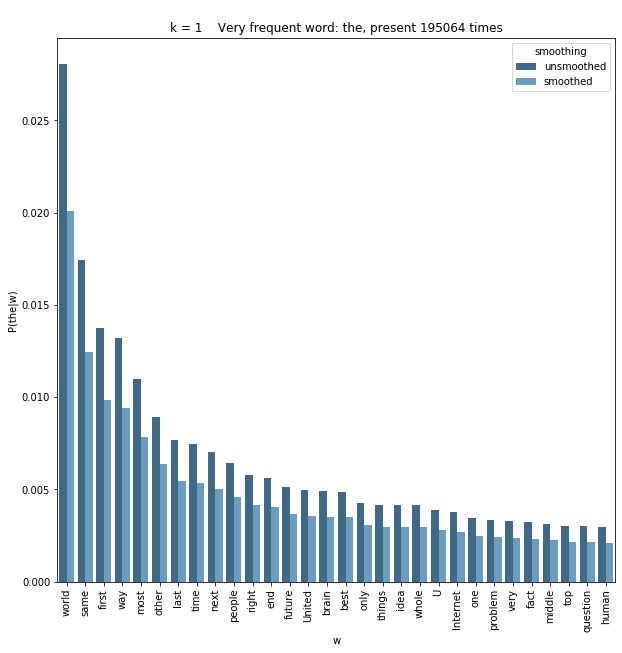

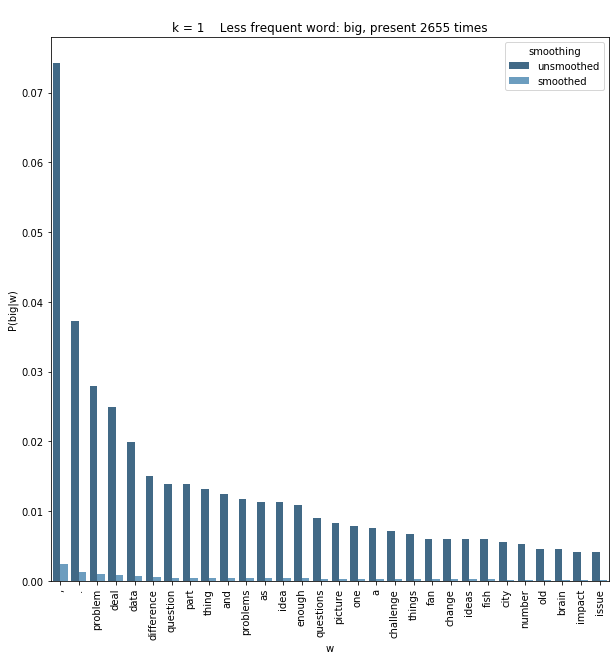

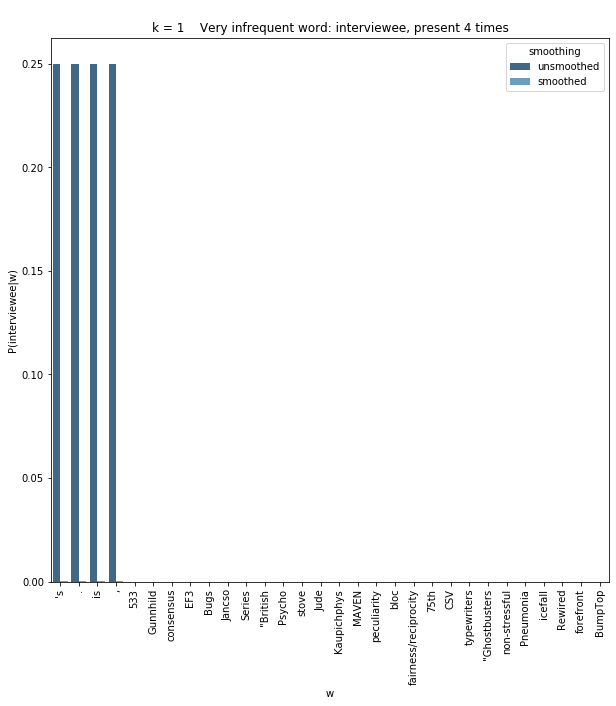

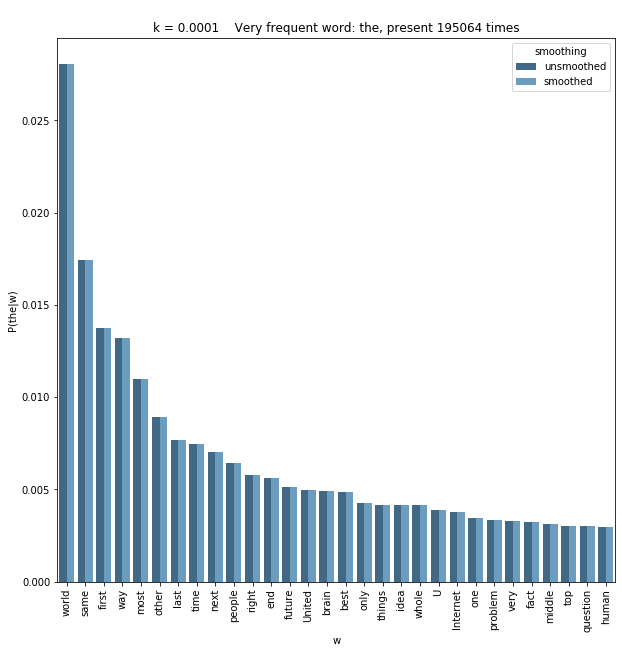

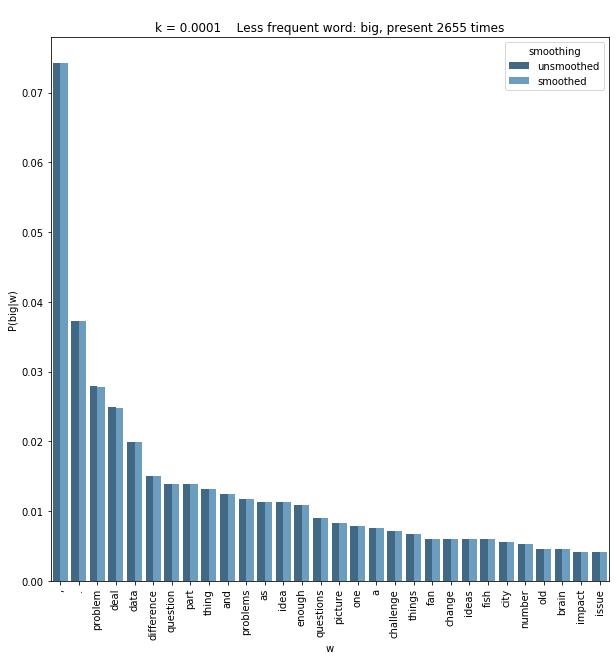

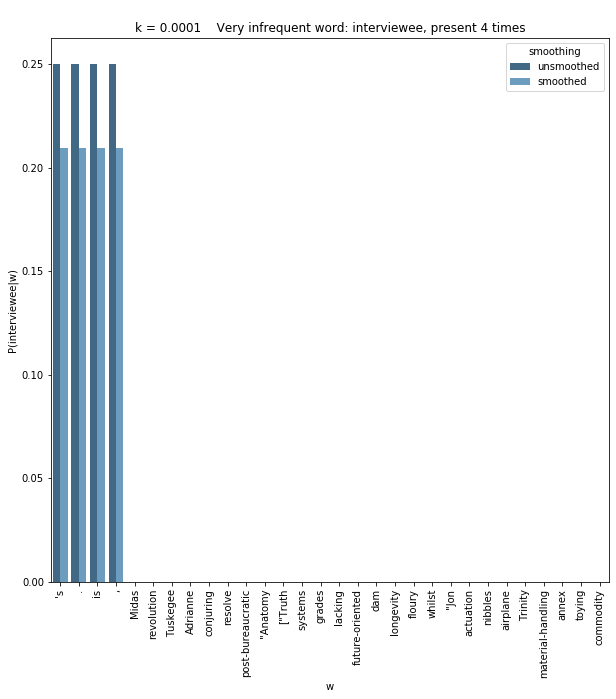

In [26]:
# YOUR CODE HERE ##
frequentWord = "the"
lessFrequentWord = "big"
infrequentWord = "interviewee"

allWords = list()
for sentence in data:
    allWords += sentence
allWords[:] = (value for value in allWords if (value != '<s>' and value != '</s>'))

title = "\nk = 1    Very frequent word: " + frequentWord + ', present ' + str(Counter(allWords)[frequentWord]) + " times"
plot_bigram_dist(frequentWord, bigram, bigram_smoothed_k1, tit=title)
title = "\nk = 1    Less frequent word: " + lessFrequentWord + ', present ' + str(Counter(allWords)[lessFrequentWord]) + " times"
plot_bigram_dist(lessFrequentWord, bigram, bigram_smoothed_k1, tit=title)
title = "\nk = 1    Very infrequent word: " + infrequentWord + ', present ' + str(Counter(allWords)[infrequentWord]) + " times"
plot_bigram_dist(infrequentWord, bigram, bigram_smoothed_k1, tit=title)

title = "\nk = 0.0001    Very frequent word: " + frequentWord + ', present ' + str(Counter(allWords)[frequentWord]) + " times"
plot_bigram_dist(frequentWord, bigram, bigram_smoothed_k00001, tit=title)
title = "\nk = 0.0001    Less frequent word: " + lessFrequentWord + ', present ' + str(Counter(allWords)[lessFrequentWord]) + " times"
plot_bigram_dist(lessFrequentWord, bigram, bigram_smoothed_k00001, tit=title)
title = "\nk = 0.0001    Very infrequent word: " + infrequentWord + ', present ' + str(Counter(allWords)[infrequentWord]) + " times"
plot_bigram_dist(infrequentWord, bigram, bigram_smoothed_k00001, tit=title)

YOUR ANSWERS HERE

Add-1 smoothing causes a large decrease in the probabilities assigned to the seen Ngrams.
This decrease is particularly large when the Ngram is present few times in the corpus: the  |V|=77807 at the denominator, indeed, has a much larger impact on the probability when the numerator is little.
For the world "the", occurring 195064 times, the decrease is not very drastic. In the case of the word big, which occurres only 2655 times, instead, so much probability mass is given to the unseen words that the probabilities of the most seen words approaches zero.
In the case of the word "interveiwee", this phenomenon is even more evident. Only 4 Ngrams start with "interviewee", and each of them appears only once in the corpus. Their probabilities after the add-1 smoothing are so low that they cannot be seen in the plot.

With a very low value of k (namely, k=0.00001), a very little amount of probability mass is given to the unseen words, and the decrease in the probability given to the most seen words can be noticed only in the case of the word "interview".
The |V| * k = 0.77807 at the denominator, is not enough to significantly reduce the probabilities assign to the most seen words for "the" and "big". A change can only be seen for "interviewee", where 1/4 = 0.25 becomes (1.00001/4.77807) = 0.21.


**Recall** that if we have a sentence $w_1,\dots,w_n$ we can write

$$P(w_1\dots w_n) = P(w_1)P(w_2|w_1) \cdots P(w_i|w_1 \dots w_{n-1}) \approx P(w_1)P(w_2|w_1)\cdots P(w_{N-1}|w_1\dots w_{N-2})\prod_{i=N}^{n} P(w_i|w_{i-(N-1)}\dots w_{i-1})$$

where in the last step we make an $N$-gram approximation of the full conditionals.

For example, in the case of a bigram (N=2), the above expression reduces to

$$P(w_1 \dots w_n)\approx P(w_1)\prod_{i=2}^{n} P(w_i| w_{i-1}).$$

## Exercise 2.4 (5 points)

The following sentences are taken from the **training data**. Use your **unsmoothed unigram**, **bigram**, and **trigram** language model to estimate their **probabilities**:

    1. Every day was about creating something new .
    2. In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought 
       together in a collision , producing a burst of pure energy .

**Repeat** this with the **smoothed (add-1)** versions of the N-grams. What is the effect of smoothing on the probabilities?


In [27]:
## YOUR CODE HERE ##

def getProb(ngram, N, sentence):
    
    # split and preprocess the sentence
    words = sentence.split(" ")
    # initialize the probability
    p = 1
    
    # in the ngram is a unigram, the keys are the words in the sentence
    if N == 1:
        for w in words:
            p *= ngram[w]
        return p
    
    start = ['<s>']
    end = ['</s>']
    i = N-1
    while i > 0:
        words = start + words
        i = i - 1
    words = words + end

    # otherwise, the history must be built 
    for i in range(len(words) - N):
        history = ""
        for n in range (N-1):
            history += words[i+n] + " "
        history = history[ : -1]
        word = words[i+N-1]
        p *= ngram[history][word]
        
    return p





s1 = "Every day was about creating something new ."
print("Sentence: " + s1 + '\n')
print("Unigram: ", format(getProb(unigram, 1, s1), '.2e'))
print("Bigram: ", format(getProb(bigram, 2, s1), '.2e'))
print("Trigram: ", format(getProb(trigram, 3, s1), '.2e'))

print("\nSmoothed Unigram: ", format(getProb(unigram_smoothed_k1, 1, s1), '.2e'))
print("Smoothed Bigram: ", format(getProb(bigram_smoothed_k1, 2, s1), '.2e'))
print("Smoothed Trigram: ", format(getProb(trigram_smoothed_k1, 3, s1), '.2e'))

s2 = "In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought together in a collision , producing a burst of pure energy ."
print("\n\nSentence: " + s2 + '\n')
print("Unigram: ", format(getProb(unigram, 1, s2), '.2e'))
print("Bigram: ", format(getProb(bigram, 2, s2), '.2e'))
print("Trigram: ", format(getProb(trigram, 3, s2), '.2e'))

print("\nSmoothed Unigram: ", format(getProb(unigram_smoothed_k1, 1, s2), '.2e'))
print("Smoothed Bigram: ", format(getProb(bigram_smoothed_k1, 2, s2), '.2e'))
print("Smoothed Trigram: ", format(getProb(trigram_smoothed_k1, 3, s2), '.2e'))


Sentence: Every day was about creating something new .

Unigram:  8.60e-24
Bigram:  4.67e-17
Trigram:  1.24e-11

Smoothed Unigram:  7.65e-24
Smoothed Bigram:  1.76e-26
Smoothed Trigram:  1.33e-32


Sentence: In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought together in a collision , producing a burst of pure energy .

Unigram:  2.97e-98
Bigram:  2.02e-72
Trigram:  3.57e-31

Smoothed Unigram:  4.35e-98
Smoothed Bigram:  2.01e-116
Smoothed Trigram:  5.34e-134


YOUR ANSWERS HERE

The smoothing always reduces the probabilities: the sentences are taken from the training data, therefore the probability of an n-gram is never null, but a bit of probability mass is removed from the seen n-grams and given to the unseen n-grams. 
Being the training data obviously made of only seen n-grams, by definition, the probability decreases with the smoothing.

The decrease is much more severe for n-grams of higher orders. This happen, once again, because the sentences are from the training data: for high-order n-grams, few cases are available for each history, then the probability assigned to the n-grams is higher than for lower-level n-grams.
With the smoothing, a large amount of probability mass is removed from this few, seen n-grams and given to the unseen ones. This causes the probabilities to drop drastically for high-level n-grams.

Notice how, as a consequence of this, even if among the unsmoothed models the ones of higher order assign the highest probabilities, among the smoothed models it is the opposite.

## Exercise 2.5 (5 points)

The above sentences were taken from the training set, hence they will all have probability greater than 0. The big challenge for our language model are of course with sentence that contain unseen N-grams: if such an N-gram occurs our model immediately assigns the sentence probability zero.

The following three senteces are taken from the **test set** availlable in the file **ted-test.txt**. What probabilities do your smoothed and unsmoothed language models asign in this case?

    1. Because these robots are really safe .
    2. We have sheer nothingness on one side , and we have this vision of a reality that encompasses every 
       conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible 
       reality .

In [28]:
### YOUR CODE HERE ###

s1 = "Because these robots are really safe ."
print("Sentence: " + s1 + '\n')
print("Unigram: ", format(getProb(unigram, 1, s1), '.2e'))
print("Bigram: ", format(getProb(bigram, 2, s1), '.2e'))
print("Trigram: ", format(getProb(trigram, 3, s1), '.2e'))

print("\nSmoothed Unigram: ", format(getProb(unigram_smoothed_k1, 1, s1), '.2e'))
print("Smoothed Bigram: ", format(getProb(bigram_smoothed_k1, 2, s1), '.2e'))
print("Smoothed Trigram: ", format(getProb(trigram_smoothed_k1, 3, s1), '.2e'))

s2 = "We have sheer nothingness on one side , and we have this vision of a reality that encompasses every conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible reality ."
print("\n\nSentence: " + s2 + '\n')
print("Unigram: ", format(getProb(unigram, 1, s2), '.2e'))
print("Bigram: ", format(getProb(bigram, 2, s2), '.2e'))
print("Trigram: ", format(getProb(trigram, 3, s2), '.2e'))

print("\nSmoothed Unigram: ", format(getProb(unigram_smoothed_k1, 1, s2), '.2e'))
print("Smoothed Bigram: ", format(getProb(bigram_smoothed_k1, 2, s2), '.2e'))
print("Smoothed Trigram: ", format(getProb(trigram_smoothed_k1, 3, s2), '.2e'))

Sentence: Because these robots are really safe .

Unigram:  3.19e-21
Bigram:  2.69e-15
Trigram:  0.00e+00

Smoothed Unigram:  2.89e-21
Smoothed Bigram:  9.38e-24
Smoothed Trigram:  2.44e-30


Sentence: We have sheer nothingness on one side , and we have this vision of a reality that encompasses every conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible reality .

Unigram:  7.26e-116
Bigram:  0.00e+00
Trigram:  0.00e+00

Smoothed Unigram:  6.89e-116
Smoothed Bigram:  1.84e-126
Smoothed Trigram:  4.68e-158


YOUR ANSWERS HERE

The probabilities assigned by the unsmoothed unigram are not null in this case because the two sentences only contain words present in the training set.
This, however, does not exclude the presence in the sentences of bigrams/trigrams absent in the training set: this explains why for the bigram and trigram models the probability happens to be zero.
This problem is solved with the smoothing, which assigns a default probability to the unseen n-grams.

### [Extra]

**Optional** What percentage of the sentences in the test set get assigned probability 0 under your smoothed and unsmoothed language models? 

In [29]:
## YOUR CODE HERE ##

test_file = "ted-test.txt"
test_data, w2i, i2w = read(test_file)   

def getZeroRatio(lm, N, test_data):
    sentenceNumber = len(test_data)
    count = 0
    for sent in test_data:
        s = ""
        for w in sent:
            s += w + " "
        s = s[4:-6]
        if getProb(lm, N, s) == 0:
            count += 1
    return count/sentenceNumber

print("What percentage of the sentences in the test set get assigned probability 0 under your smoothed and unsmoothed language models?")
print("\nUnigram: " + "{:>5}".format(str(round(getZeroRatio(unigram, 1, test_data) * 100, 2))) + "%")
print("Bigram: " + str(round(getZeroRatio(bigram, 2, test_data) * 100, 2)) + "%")
print("Trigram: " + str(round(getZeroRatio(trigram, 3, test_data) * 100, 2)) + "%")

print("Smoothed Unigram: " + str(getZeroRatio(unigram_smoothed_k1, 1, test_data) * 100) + "%")
print("Smoothed Bigram: " + str(getZeroRatio(bigram_smoothed_k1, 2, test_data) * 100) + "%")
print("Smoothed Trigram: " + str(getZeroRatio(trigram_smoothed_k1, 3, test_data) * 100) + "%")


What percentage of the sentences in the test set get assigned probability 0 under your smoothed and unsmoothed language models?

Unigram: 11.19%
Bigram: 71.33%
Trigram: 89.16%
Smoothed Unigram: 0.0%
Smoothed Bigram: 0.0%
Smoothed Trigram: 0.34965034965034963%


In a smoothed n-gram, a sentence should never get assigned a zero probability. For the smoothed trigram, it happens once, in the case of the longest sentence in the test set. The computed probability is so low that it becomes zero.

## Exercise 2.6 (5 points)

**Perplexity** is very frequently used **metric** for evaluating probabilistic models such as language models. The perplexity (sometimes called **PP** for short) of a language model on a sentence is the **inverse probability** of the sentence, **normalized** by the number of words:

$$PP(w_1 \dots w_n) = P(w_1\dots w_n)^{-\frac{1}{n}}.$$

Here we can again approximate $P(w_1 \dots w_n)$ with N-gram probabilities, as above.
Note: $(x_1\cdots x_n)^{-\frac{1}{n}}$ is the **geometric mean** of the numbers $x_1,\dots,x_n$. It is like the (regular) artithmetic mean, but with **products** instead of **sums**. The geometric mean is a more natural choice in the case of *PP* because behind $P(w_1\dots w_n)$ is a series of $n$ products ([more here](https://en.wikipedia.org/wiki/Geometric_mean)).



Compute the perplexity of the training sentences from excercise 2.1. What big difference between the **probabilities** of the sentences and the **perplexities** of the sentences do you notice?

In [30]:
### YOUR CODE HERE ###

def getPerplextity(ngram, N, sentence):
    n = len(sentence.split())
    p = getProb(ngram, N, sentence)
    if p == 0:
        return float("inf")
    pp = p**(-1/n)
    return pp

def printPercentageAndPerplexity(s):
    print("\n\n" + s + '\n')
    print("Unigram:\t\tp=", format(getProb(unigram, 1, s), '.2e'), "\tpp=", round(getPerplextity(unigram, 1, s), 1))
    print("Bigram:\t\t\tp=", format(getProb(bigram, 2, s), '.2e'), "\tpp=", round(getPerplextity(bigram, 2, s), 1))
    print("Trigram:\t\tp=", format(getProb(trigram, 3, s), '.2e'), "\tpp=", round(getPerplextity(trigram, 3, s), 1))

    print("\nSmoothed Unigram:\tp=", format(getProb(unigram_smoothed_k1, 1, s), '.2e'), "\tpp=", round(getPerplextity(unigram_smoothed_k1, 1, s), 1))
    print("Smoothed Bigram:\tp=", format(getProb(bigram_smoothed_k1, 2, s), '.2e'), "\tpp=", round(getPerplextity(bigram_smoothed_k1, 2, s), 1))
    print("Smoothed Trigram:\tp=", format(getProb(trigram_smoothed_k1, 3, s), '.2e'), "\tpp=", round(getPerplextity(trigram_smoothed_k1, 3, s), 1))
    
for sTrain in data[:5]:
    s = ""
    for w in sTrain:
        if w != "<s>" and w != "</s>":
            s += w + " "
    s = s[:-1]
    printPercentageAndPerplexity(s)
    
print("\n\n--- It is also interesting to see what happens to perplexity with a sentence from the test set:")
sTest = "Because these robots are really safe ."
printPercentageAndPerplexity(sTest)



Here are two reasons companies fail : they only do more of the same , or they only do what 's new .

Unigram:		p= 1.56e-61 	pp= 440.4
Bigram:			p= 6.52e-48 	pp= 112.6
Trigram:		p= 3.34e-32 	pp= 23.4

Smoothed Unigram:	p= 1.11e-61 	pp= 446.9
Smoothed Bigram:	p= 1.91e-69 	pp= 972.2
Smoothed Trigram:	p= 1.90e-92 	pp= 9724.4


To me the real , real solution to quality growth is figuring out the balance between two activities : exploration and exploitation .

Unigram:		p= 8.67e-72 	pp= 1229.3
Bigram:			p= 2.99e-54 	pp= 212.4
Trigram:		p= 2.34e-25 	pp= 11.8

Smoothed Unigram:	p= 6.54e-72 	pp= 1244.4
Smoothed Bigram:	p= 2.33e-85 	pp= 4782.8
Smoothed Trigram:	p= 7.19e-100 	pp= 20444.3


Both are necessary , but it can be too much of a good thing .

Unigram:		p= 1.20e-39 	pp= 393.2
Bigram:			p= 7.71e-26 	pp= 47.2
Trigram:		p= 6.63e-20 	pp= 19.0

Smoothed Unigram:	p= 9.78e-40 	pp= 398.7
Smoothed Bigram:	p= 3.02e-40 	pp= 431.2
Smoothed Trigram:	p= 5.06e-54 	pp= 3573.0


Consider Facit .

Unigra

**What big difference between the probabilities of the sentences and the perplexities of the sentences do you notice?**

YOUR ANSWER HERE

Low probabilities correspond to high perplexities.
The probability is not the only factor to determine perplexity thought, since also the length of the sentence plays an important role in computing the perplexity value: between two sentences with the same assigned probability, the shorter one has an highest perplexity.

# That's it!

Congratulations, you have made it to the end of the tutorial. Here we will recap the gist of this notebook. 

**Make sure all your cells can be executed and all your answers are there. Then, read on if you're interested!**

-----

By now you should have a solid feeling for the problem of **sparsity in language data**; there's just never enough data. For the task of language modelling, we saw that sparsity is a serious challenge. 

It would be great to be able to model $p(w_n|w_1 \dots w_{n-1})$ for unlimited $n$: the larger $n$ the better our language model should become at capturing the long-range dependencies between words that characterize actual human sentences, and the more probability our model will asign to such sentences as opposed to sentences that are word-soup. But in the N-gram approach, increasing $n$ will quickly kill all generalizing abilities of the model: the model will start to asign probabilities only to sentences it has seen in the training data.

So, where to go from here? Here are three directions that we could head in.

### Smoothing

We have seen one example of smoothing in this lab: add-k smoothing. This is an easy method, both conceptually and implementation-wise. But the results are not great, and the effects it has on the distributions can be extreme.

A much more sophisticated method of smoothing is so-called **Kneser-Ney smoothing**. The method is described in detail in section 4.5 of J&M (3rd edition). This is one of the best performing N-gram smoothing methods, and up to a few years ago a popular implementation of it called [KenLM](https://kheafield.com/code/kenlm/) gave state of the art results.

### From words to characters

In this lab we have considered language modeling as the task of predicting a **word** $w_n$ based on a history of **words** $w_1\cdots w_n$. What if instead we let our basic units of modelling be **characters**? The task then becomes to model $p(c_k\mid c_{k-N-1}\dots c_{k-1})$ where each $c_i$ is now an ASCII character instead of an entire word.

Suddenly sparsity of data is no longer a problem! The set of characters to use is tiny (< 100) compared to even a small-sized vocabulary as today. Have a look at this very illustrative notebook written by Yoav Golberg to see such a method in action: [The unreasonable effectiveness of Character-level Language Models](http://nbviewer.jupyter.org/gist/yoavg/d76121dfde2618422139).

(So what is the downside?)


### Neural language models

The above notebook was actually written as a response to this blog post by Andrej Karpathy: [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). Go ahead and read it if you haven't already: it is a superb introduction to the topic of Recurrent Neural Networks.

Neural language models solve the problem of data sparsity in a different manner. Instead of estimating the probabilities $p(w_k\mid w_{k-N-1}\dots w_{k-1})$ by counting occurences in the data, they use a neural network $f_{\theta}$ parametrized by parameters $\theta$ to predict this probability. The parameters $\theta$ are learned through optimization. 

The simplest approach goes like this: each word in the history $w_{k-N-1}\dots w_{k-1}$ is embedded separately giving  vectors $e_{k-N-1}\dots e_{k-1}$ and then concatenated into one long vectors $[e_{k-N-1};\dots ;e_{k-1}]$. The network then uses this history vector to predict a probability distribution over words $w$ in the vocabulary $V$:

$$p(w \mid w_{k-N-1}\dots w_{k-1}) = f_{\theta}([e_{k-N-1};\dots;e_{k-1}]).$$

(In order to produce legitimate probabilities the final layer of such a network will be for example a $softmax$.)

This provides a solution to the sparsity problem by having the network let the individual embeddings of the words in the history interact through its non-linear transforamtion. We are letting the network figure out the smoothing itself!

RNNs are a clever extension of this idea, where a hidden state vector $h$ is re-used and updated at each step $k$ in order to store the information of the entire history up to step $k-1$. That is, an RNN actually does away with the N-order approximation; it tries to model the full conditional directly! That means that

$$p(w \mid w_1\dots w_{k-1}) \approx RNN_{\theta}([e_{k-1};h_{k-1}])$$

where the hidden state $h_{k-1}$ is a compression of the *entire history* $w_1\dots w_{k-1}$.

Another great place to learn about RNNs, their problems, and solutions to those, is on the blog of [Christopher Olah](http://colah.github.io/posts/2015-08-Understanding-LSTMs/). 

-----------
(And now, it's time to read the classic essay by Eugene Wigner that gave both of the posts their title: [The Unreasonable Effectiveness of Mathematics in the Natural Sciences](http://www.dartmouth.edu/~matc/MathDrama/reading/Wigner.html))


Acknowledgements: Most of this lab was developed in collabnoration with Joost Bastings and Dan Douwe.